<a href="https://colab.research.google.com/github/dorelysm/AI_practices/blob/main/Decision_trees_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Titanic Kaggle
#https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [4]:
import pandas as pd
datos = pd.read_csv('train.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

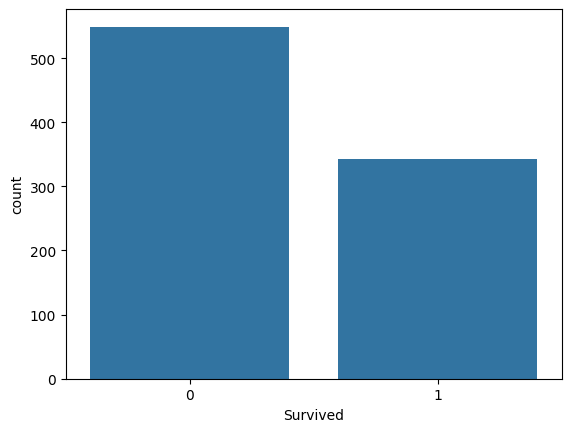

In [6]:
import seaborn as sb
sb.countplot(x='Survived', data=datos)

<Axes: xlabel='Survived', ylabel='count'>

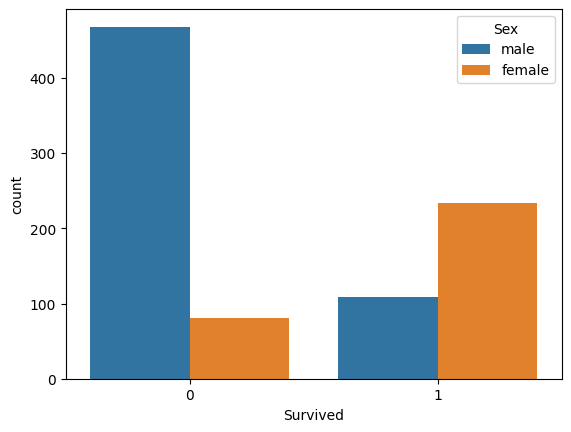

In [7]:
sb.countplot(x='Survived', data=datos, hue="Sex")

In [8]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


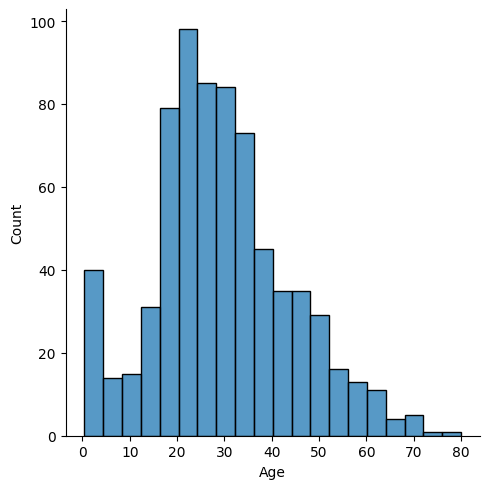

In [9]:
sb.displot(x="Age", data=datos)

In [10]:
datos["Age"].mean()
datos["Age"] = datos["Age"].fillna(datos['Age'].mean())

In [11]:
datos = datos.drop(["Cabin"], axis=1)

In [12]:
datos = datos.dropna()

In [13]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [14]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype = int)

In [15]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [16]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

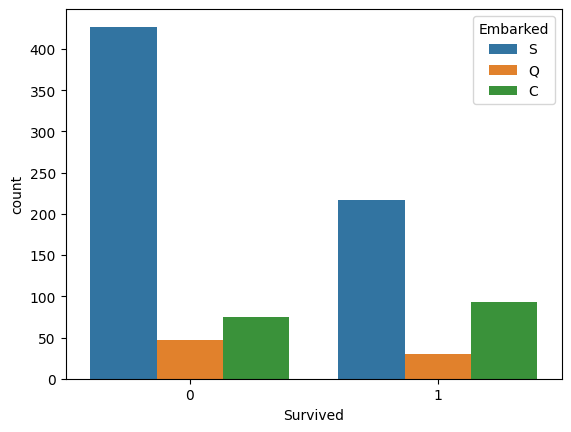

In [17]:
sb.countplot(x="Survived", data = datos, hue = "Embarked")

In [18]:
dummies_Embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype = int)

In [19]:
datos = datos.join(dummies_Embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

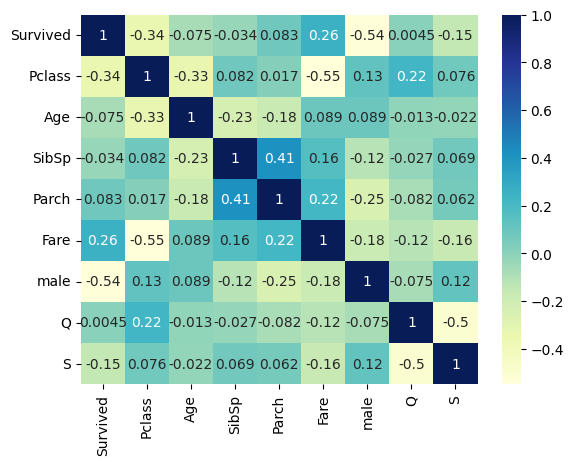

In [20]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

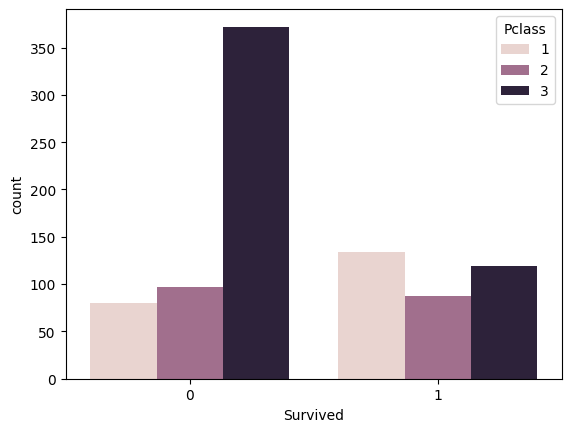

In [21]:
sb.countplot(x="Survived", data = datos, hue = "Pclass")

In [22]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [23]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size = 0.2)

In [24]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7528089887640449

In [35]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1, 15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Exactitud con profundidad {i}: {exactitud}")
  resultados.append(exactitud)

Exactitud con profundidad 1: 0.8089887640449438
Exactitud con profundidad 2: 0.7696629213483146
Exactitud con profundidad 3: 0.8314606741573034
Exactitud con profundidad 4: 0.8033707865168539
Exactitud con profundidad 5: 0.8258426966292135
Exactitud con profundidad 6: 0.8146067415730337
Exactitud con profundidad 7: 0.8033707865168539
Exactitud con profundidad 8: 0.797752808988764
Exactitud con profundidad 9: 0.8089887640449438
Exactitud con profundidad 10: 0.8033707865168539
Exactitud con profundidad 11: 0.797752808988764
Exactitud con profundidad 12: 0.7865168539325843
Exactitud con profundidad 13: 0.7584269662921348
Exactitud con profundidad 14: 0.7584269662921348


In [36]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

<Axes: >

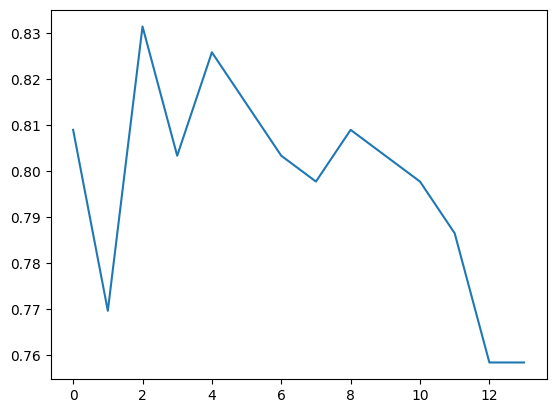

In [37]:
sb.lineplot(data=resultados)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.78      0.76      0.77        66

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,98,14
Real: Si,16,50


[Text(0.5, 0.875, 'male <= 0.5\n0.474\n711\n[437, 274]\nMurió'),
 Text(0.25, 0.625, 'Pclass <= 2.5\n0.385\n246\n[64, 182]\nVivió'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\n0.071\n135\n[5, 130]\nVivió'),
 Text(0.0625, 0.125, '0.5\n2\n[1, 1]\nMurió'),
 Text(0.1875, 0.125, '0.058\n133\n[4, 129]\nVivió'),
 Text(0.375, 0.375, 'Fare <= 23.35\n0.498\n111\n[59, 52]\nMurió'),
 Text(0.3125, 0.125, '0.491\n88\n[38.0, 50.0]\nVivió'),
 Text(0.4375, 0.125, '0.159\n23\n[21, 2]\nMurió'),
 Text(0.75, 0.625, 'Age <= 13.0\n0.317\n465\n[373, 92]\nMurió'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 2.5\n0.489\n33\n[14, 19]\nVivió'),
 Text(0.5625, 0.125, '0.1\n19\n[1, 18]\nVivió'),
 Text(0.6875, 0.125, '0.133\n14\n[13, 1]\nMurió'),
 Text(0.875, 0.375, 'Fare <= 26.269\n0.281\n432\n[359, 73]\nMurió'),
 Text(0.8125, 0.125, '0.189\n322\n[288, 34]\nMurió'),
 Text(0.9375, 0.125, '0.458\n110\n[71, 39]\nMurió')]

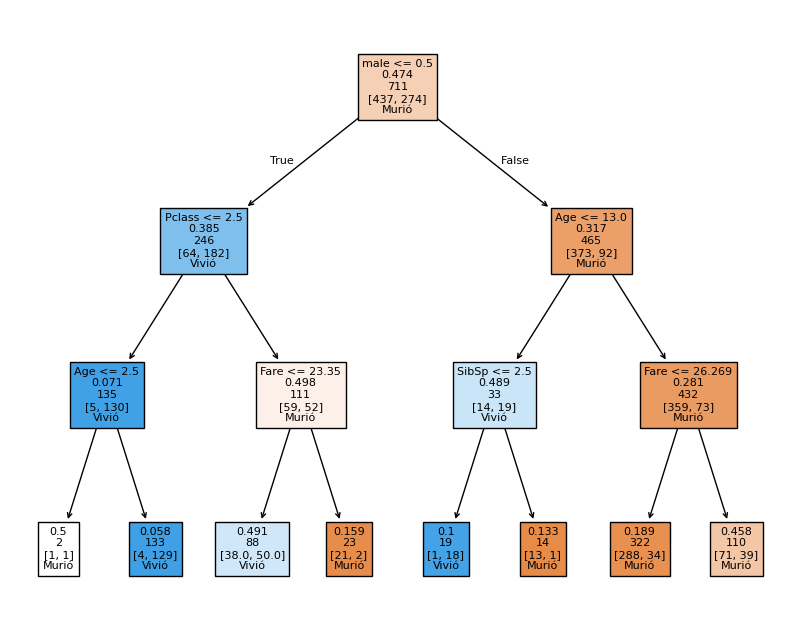

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(modelo,
          feature_names=X_ent.columns,
          class_names=["Murió", "Vivió"],
          filled=True,
          label="none")